In [1]:
import pandas as pd
import numpy as np
pd.options.display.max_columns=None
pd.options.display.max_rows=150
pd.options.display.max_colwidth = None

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (5,5)

import seaborn as sns

In [47]:
df = pd.read_csv('sample_100k_null_treated_with_status.csv')
#df.drop('Unnamed: 0',axis=1,inplace=True)

col_desc = pd.read_csv('HomeCredit_columns_description.csv', encoding='latin1')
description = col_desc[col_desc['Table']=='application_{train|test}.csv'][['Row','Description','Special']]
description

,Row,Description,Special
0,SK_ID_CURR,ID of loan in our sample,NaN
1,TARGET,"Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)",NaN
2,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,CODE_GENDER,Gender of the client,NaN
4,FLAG_OWN_CAR,Flag if the client owns a car,NaN
5,FLAG_OWN_REALTY,Flag if client owns a house or flat,NaN
6,CNT_CHILDREN,Number of children the client has,NaN
7,AMT_INCOME_TOTAL,Income of the client,NaN
8,AMT_CREDIT,Credit amount of the loan,NaN
9,AMT_ANNUITY,Loan annuity,NaN


In [48]:
df.drop(['SK_ID_CURR','FLOORSMIN_AVG', 'APARTMENTS_MEDI', 'FLOORSMIN_MEDI', 'LIVINGAPARTMENTS_AVG', 'FLOORSMAX_AVG', 'LIVINGAREA_AVG', 
 'ELEVATORS_AVG', 'YEARS_BUILD_AVG', 'LIVINGAREA_MEDI', 'ELEVATORS_MEDI', 'YEARS_BUILD_MEDI', 'APARTMENTS_AVG', 
 'FLOORSMAX_MEDI','OBS_60_CNT_SOCIAL_CIRCLE'],axis=1,inplace=True)

In [4]:
# libraries for model fitting
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

# libraries for model evaluation
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score,roc_curve
from sklearn.metrics import confusion_matrix, classification_report
#from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")

print("All libraries are imported")

All libraries are imported


In [5]:
X = df.drop(['TARGET'],axis=1)
y = df['TARGET']

In [6]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [7]:
clfs = {
    "Logreg":LogisticRegression(),
    "KNN":KNeighborsClassifier(),
    "Navie Bayes":GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "AdaBoost":AdaBoostClassifier(),
    "GradientBoosting":GradientBoostingClassifier(),
    "XGboost":XGBClassifier()
    #"SVM":SVC()
}

models_report = pd.DataFrame(columns=["Model","Accuracy","Recall","Precision","F1"])


for clf,clf_name in list(zip(clfs.values(), clfs.keys())):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_pred_prob = clf.predict_proba(X_test)
    print("Fitting the model.....",clf_name)
    t = pd.Series({
        "Model":clf_name,
        "Accuracy":accuracy_score(y_test, y_pred),
        "Recall":recall_score(y_test, y_pred),
        "Precision":precision_score(y_test, y_pred),
        "F1":f1_score(y_test, y_pred),
        'ROC':roc_auc_score(y_test,y_pred_prob[:,1])
        
    })
    models_report = models_report.append(t, ignore_index=True)
    
models_report = models_report.sort_values(by="F1",ascending= False)

models_report

Fitting the model..... Logreg
Fitting the model..... KNN
Fitting the model..... Navie Bayes
Fitting the model..... Decision Tree
Fitting the model..... Random Forest
Fitting the model..... AdaBoost
Fitting the model..... GradientBoosting
Fitting the model..... XGboost


,Model,Accuracy,Recall,Precision,F1,ROC
2,Navie Bayes,0.548822,0.654982,0.112484,0.191996,0.629604
3,Decision Tree,0.850161,0.161747,0.140117,0.150157,0.536635
7,XGboost,0.916700,0.037515,0.403974,0.068655,0.735843
1,KNN,0.912875,0.025215,0.219251,0.045229,0.573217
5,AdaBoost,0.917556,0.020295,0.423077,0.038732,0.741541
6,GradientBoosting,0.917808,0.010455,0.414634,0.020396,0.749825
0,Logreg,0.918412,0.009840,0.592593,0.019359,0.739055
4,Random Forest,0.918160,0.000000,0.000000,0.000000,0.713190


In [8]:
def model_fit(modelname,X_train, y_train):
    modelname.fit(X_train, y_train)
    m=modelname.predict_proba(X_test)
    y_pred_prob = m[:,1]
    fpr, tpr, thresholds = roc_curve(y_test,y_pred_prob)
    optimal_idx = np.argmax(tpr - fpr)
    optimal_threshold = thresholds[optimal_idx]
    y_pred = (y_pred_prob>optimal_threshold)*1
    print(str(modelname).split('(')[0])
    print(classification_report(y_test,y_pred))
    print(str(modelname).split('(')[0],':','ROC_QUC_SCORE--',roc_auc_score(y_test,y_pred_prob))

In [9]:
GradientBoosting=GradientBoostingClassifier()
model_fit(GradientBoosting,X_train, y_train)

GradientBoostingClassifier
              precision    recall  f1-score   support

           0       0.96      0.75      0.84     18242
           1       0.18      0.62      0.28      1626

    accuracy                           0.74     19868
   macro avg       0.57      0.69      0.56     19868
weighted avg       0.89      0.74      0.79     19868

GradientBoostingClassifier : ROC_QUC_SCORE-- 0.7499658648324231


In [10]:
def show_metrics(*models):

    for model in models:
        model.fit(X_train,y_train)
        model_name = str(model).split('(')[0]
        
        print(model_name)
        
        y_scores = model.predict_proba(X_test)[:,1]

        fpr,tpr,t = roc_curve(y_test,y_scores)
        ind = np.argmax(tpr-fpr)
        optimal_t = t[ind]
        y_pred = (y_scores>optimal_t)*1
        print(metrics.classification_report(y_test,y_pred))
        cm = metrics.confusion_matrix(y_test,y_pred)
        metrics.ConfusionMatrixDisplay(cm).plot()
        plt.show()
        score = metrics.roc_auc_score(y_test,y_scores)
        score = round(score,4)
        print('ROC AUC Score:',score)


        plt.plot(fpr,tpr,label=model_name+' AUC:'+str(score))
        plt.plot([0,1],[0,1],'r--')
        plt.xlabel('FPR')
        plt.ylabel('TPR')
        plt.legend()
        plt.show()
        print()
        print()

GradientBoostingClassifier
              precision    recall  f1-score   support

           0       0.96      0.74      0.84     18242
           1       0.18      0.63      0.28      1626

    accuracy                           0.73     19868
   macro avg       0.57      0.69      0.56     19868
weighted avg       0.89      0.73      0.79     19868



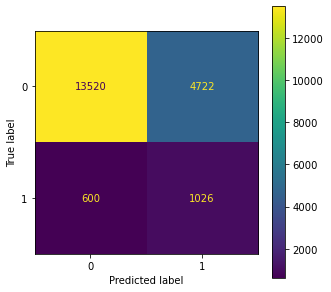

ROC AUC Score: 0.7499


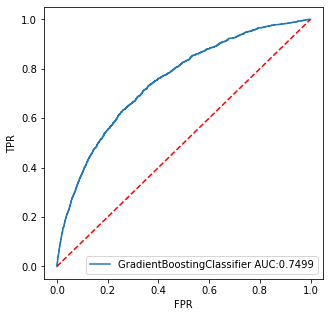

In [11]:
show_metrics(GradientBoosting)

In [13]:
Adaboost=AdaBoostClassifier()
model_fit(Adaboost,X_train, y_train)

AdaBoostClassifier
              precision    recall  f1-score   support

           0       0.96      0.72      0.82     18242
           1       0.17      0.64      0.27      1626

    accuracy                           0.71     19868
   macro avg       0.56      0.68      0.55     19868
weighted avg       0.89      0.71      0.78     19868

AdaBoostClassifier : ROC_QUC_SCORE-- 0.741540968336994


AdaBoostClassifier
              precision    recall  f1-score   support

           0       0.96      0.72      0.82     18242
           1       0.17      0.64      0.27      1626

    accuracy                           0.71     19868
   macro avg       0.56      0.68      0.55     19868
weighted avg       0.89      0.71      0.78     19868



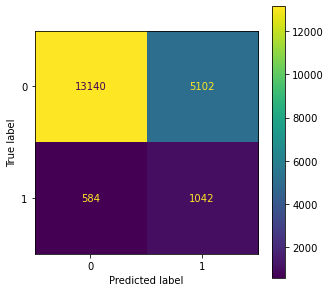

ROC AUC Score: 0.7415


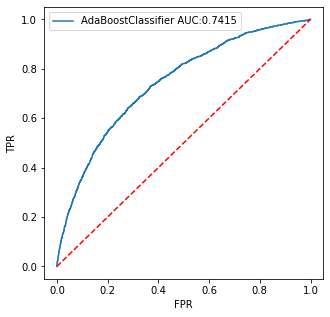

In [15]:
show_metrics(Adaboost)

In [16]:
Logreg=LogisticRegression()
#model_fit(Logreg,X_train, y_train)

LogisticRegression
              precision    recall  f1-score   support

           0       0.96      0.71      0.81     18242
           1       0.16      0.65      0.26      1626

    accuracy                           0.70     19868
   macro avg       0.56      0.68      0.54     19868
weighted avg       0.89      0.70      0.77     19868



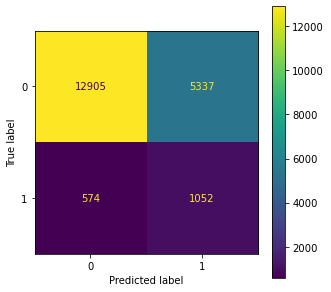

ROC AUC Score: 0.7391


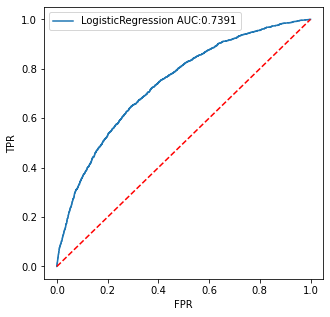

In [17]:
show_metrics(Logreg)

In [18]:
#Best parameters for XGBoost classifier:  {'gamma': 4, 'learning_rate': 0.1, 'max_depth': 3}

XGBClassifier
              precision    recall  f1-score   support

           0       0.96      0.68      0.79     18242
           1       0.16      0.67      0.25      1626

    accuracy                           0.68     19868
   macro avg       0.56      0.68      0.52     19868
weighted avg       0.89      0.68      0.75     19868



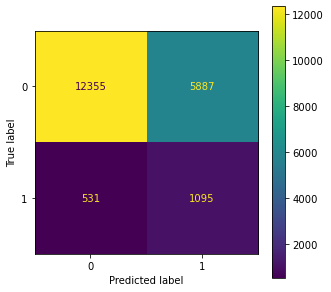

ROC AUC Score: 0.7358


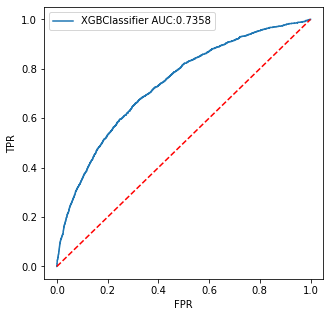

In [21]:
xg = XGBClassifier()
show_metrics(xg)

In [22]:
#fine tunning

XGBClassifier
              precision    recall  f1-score   support

           0       0.96      0.65      0.78     18242
           1       0.15      0.72      0.25      1626

    accuracy                           0.66     19868
   macro avg       0.56      0.68      0.52     19868
weighted avg       0.90      0.66      0.73     19868



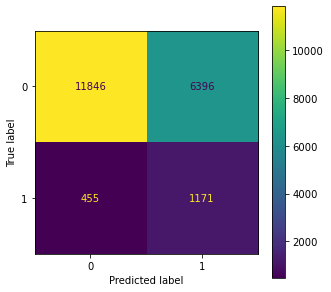

ROC AUC Score: 0.749


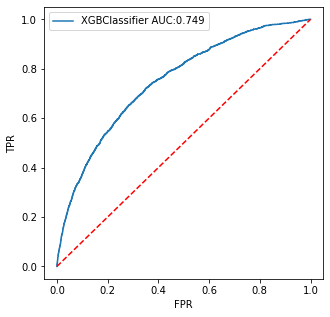

In [23]:
#{'gamma': 4, 'learning_rate': 0.1, 'max_depth': 3}
TuneXG = XGBClassifier(gamma=4,learning_rate=0.1,max_depth=3)
show_metrics(TuneXG)

In [24]:
TuneGradientBoosting=GradientBoostingClassifier(learning_rate=0.2,max_depth=3)
#model_fit(GradientBoosting,X_train, y_train)

GradientBoostingClassifier
              precision    recall  f1-score   support

           0       0.96      0.67      0.79     18242
           1       0.16      0.71      0.26      1626

    accuracy                           0.67     19868
   macro avg       0.56      0.69      0.52     19868
weighted avg       0.90      0.67      0.74     19868



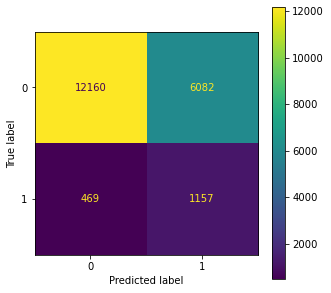

ROC AUC Score: 0.7518


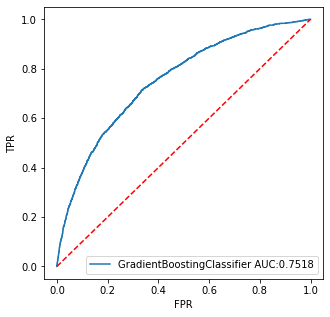

In [25]:
show_metrics(TuneGradientBoosting)

In [26]:
TuneAdaboost=AdaBoostClassifier(n_estimators=70,learning_rate=1)
#model_fit(adaboost,X_train, y_train)

AdaBoostClassifier
              precision    recall  f1-score   support

           0       0.96      0.69      0.80     18242
           1       0.16      0.68      0.26      1626

    accuracy                           0.68     19868
   macro avg       0.56      0.68      0.53     19868
weighted avg       0.89      0.68      0.76     19868



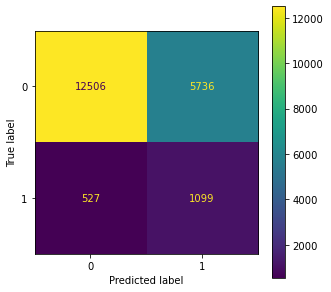

ROC AUC Score: 0.7437


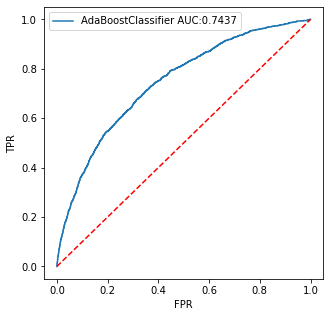

In [27]:
show_metrics(TuneAdaboost)

In [28]:
TuneLogreg=LogisticRegression(penalty='l1',C=0.1,solver='liblinear')
#model_fit(Logreg,X_train, y_train)

LogisticRegression
              precision    recall  f1-score   support

           0       0.96      0.67      0.79     18242
           1       0.16      0.70      0.26      1626

    accuracy                           0.67     19868
   macro avg       0.56      0.68      0.52     19868
weighted avg       0.90      0.67      0.74     19868



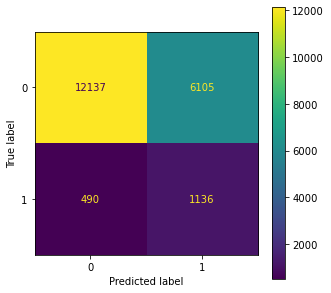

ROC AUC Score: 0.7458


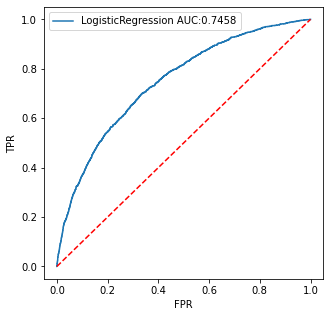

In [29]:
show_metrics(TuneLogreg)

In [ ]:
def show_(*models):

    for model in models:
        model.fit(X_train,y_train)
        model_name = str(model).split('(')[0]
        
        print(model_name)
        
        y_scores = model.predict_proba(X_test)[:,1]

        fpr,tpr,t = roc_curve(y_test,y_scores)
        ind = np.argmax(tpr-fpr)
        optimal_t = t[ind]
        y_pred = (y_scores>optimal_t)*1
        print(metrics.classification_report(y_test,y_pred))
        cm = metrics.confusion_matrix(y_test,y_pred)
        metrics.ConfusionMatrixDisplay(cm).plot()
        plt.show()
        score = metrics.roc_auc_score(y_test,y_scores)
        score = round(score,4)
        print('ROC AUC Score:',score)


        plt.plot(fpr,tpr,label=model_name+' AUC:'+str(score))
        plt.plot([0,1],[0,1],'r--')
        plt.xlabel('FPR')
        plt.ylabel('TPR')
        plt.legend()
        plt.show()
        print()
        print()

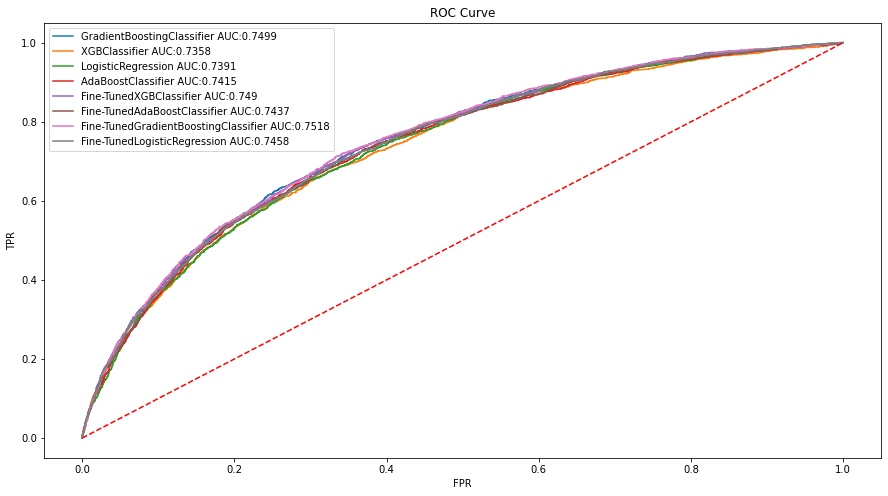

In [45]:
plt.figure(figsize=(15,8))
i=0
models = [GradientBoosting,xg,Logreg,Adaboost,TuneXG,TuneAdaboost,TuneGradientBoosting,TuneLogreg]
for model in models:
    
    model_name = str(model).split('(')[0]
    i+=1
    if i>4: model_name = 'Fine-Tuned' + model_name
    #print(model_name)

    y_scores = model.predict_proba(X_test)[:,1]

    fpr,tpr,t = roc_curve(y_test,y_scores)
    score = metrics.roc_auc_score(y_test,y_scores)
    score = round(score,4)
    #print('ROC AUC Score:',score)


    plt.plot(fpr,tpr,label=model_name+' AUC:'+str(score))
    
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    
plt.plot([0,1],[0,1],'r--')
plt.title('ROC Curve')
plt.legend()
plt.show()

              precision    recall  f1-score   support

           0       0.96      0.74      0.84     18242
           1       0.18      0.63      0.28      1626

    accuracy                           0.73     19868
   macro avg       0.57      0.69      0.56     19868
weighted avg       0.89      0.73      0.79     19868



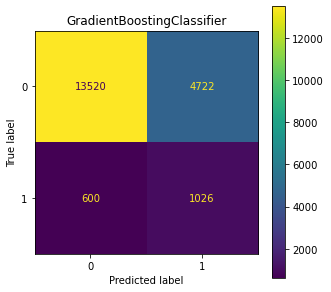

              precision    recall  f1-score   support

           0       0.96      0.68      0.79     18242
           1       0.16      0.67      0.25      1626

    accuracy                           0.68     19868
   macro avg       0.56      0.68      0.52     19868
weighted avg       0.89      0.68      0.75     19868



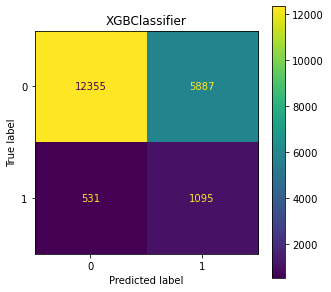

              precision    recall  f1-score   support

           0       0.96      0.71      0.81     18242
           1       0.16      0.65      0.26      1626

    accuracy                           0.70     19868
   macro avg       0.56      0.68      0.54     19868
weighted avg       0.89      0.70      0.77     19868



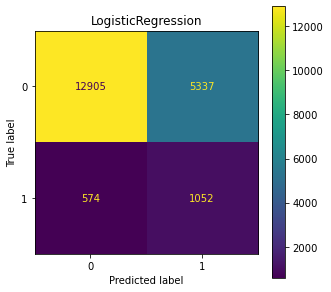

              precision    recall  f1-score   support

           0       0.96      0.72      0.82     18242
           1       0.17      0.64      0.27      1626

    accuracy                           0.71     19868
   macro avg       0.56      0.68      0.55     19868
weighted avg       0.89      0.71      0.78     19868



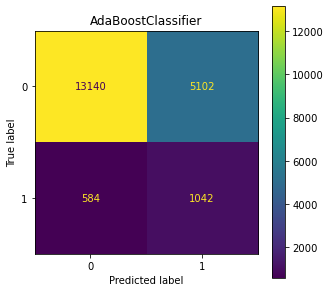

              precision    recall  f1-score   support

           0       0.96      0.65      0.78     18242
           1       0.15      0.72      0.25      1626

    accuracy                           0.66     19868
   macro avg       0.56      0.68      0.52     19868
weighted avg       0.90      0.66      0.73     19868



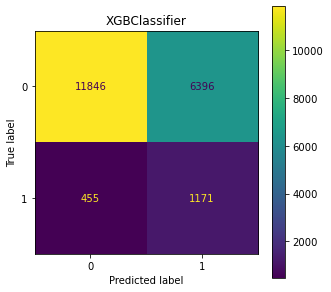

              precision    recall  f1-score   support

           0       0.96      0.69      0.80     18242
           1       0.16      0.68      0.26      1626

    accuracy                           0.68     19868
   macro avg       0.56      0.68      0.53     19868
weighted avg       0.89      0.68      0.76     19868



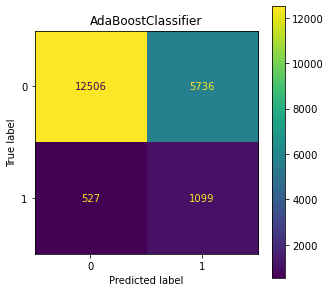

              precision    recall  f1-score   support

           0       0.96      0.67      0.79     18242
           1       0.16      0.71      0.26      1626

    accuracy                           0.67     19868
   macro avg       0.56      0.69      0.52     19868
weighted avg       0.90      0.67      0.74     19868



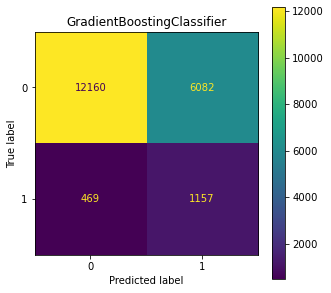

              precision    recall  f1-score   support

           0       0.96      0.67      0.79     18242
           1       0.16      0.70      0.26      1626

    accuracy                           0.67     19868
   macro avg       0.56      0.68      0.52     19868
weighted avg       0.90      0.67      0.74     19868



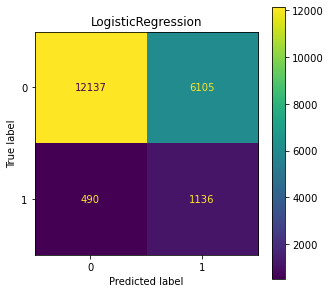

In [41]:
#plt.figure(figsize=(4,4))

for model in models:
    #plt.subplot(4,i,j)
    model_name = str(model).split('(')[0]
    #print(model_name)

    y_scores = model.predict_proba(X_test)[:,1]

    fpr,tpr,t = roc_curve(y_test,y_scores)
    ind = np.argmax(tpr-fpr)
    optimal_t = t[ind]
    y_pred = (y_scores>optimal_t)*1
    print(metrics.classification_report(y_test,y_pred))
    cm = metrics.confusion_matrix(y_test,y_pred)
    metrics.ConfusionMatrixDisplay(cm).plot()
    
    plt.title(model_name)
    plt.show()
    

In [46]:
X_train.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,HOUR_APPR_PROCESS_START,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_MODE,YEARS_BUILD_MODE,ELEVATORS_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LIVINGAREA_MODE,LIVINGAPARTMENTS_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_EMPLOYED_NULL,OWN_CAR_AGE_NULL,EXT_SOURCE_1_NULL,EXT_SOURCE_3_NULL,APARTMENTS_AVG_NULL,YEARS_BUILD_AVG_NULL,ELEVATORS_AVG_NULL,FLOORSMAX_AVG_NULL,FLOORSMIN_AVG_NULL,LIVINGAPARTMENTS_AVG_NULL,LIVINGAREA_AVG_NULL,APARTMENTS_MODE_NULL,YEARS_BUILD_MODE_NULL,ELEVATORS_MODE_NULL,FLOORSMAX_MODE_NULL,FLOORSMIN_MODE_NULL,LIVINGAREA_MODE_NULL,APARTMENTS_MEDI_NULL,YEARS_BUILD_MEDI_NULL,ELEVATORS_MEDI_NULL,FLOORSMAX_MEDI_NULL,FLOORSMIN_MEDI_NULL,LIVINGAPARTMENTS_MEDI_NULL,LIVINGAREA_MEDI_NULL,TOTALAREA_MODE_NULL,AMT_REQ_CREDIT_BUREAU_MON_NULL,AMT_REQ_CREDIT_BUREAU_YEAR_NULL,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_M,CODE_GENDER_XNA,FLAG_OWN_CAR_Y,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Unspecified,OCCUPATION_TYPE_Waiters/barmen staff,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business Entity Type 1,ORGANIZATION_TYPE_Business Entity Type 2,ORGANIZATION_TYPE_Business Entity Type 3,ORGANIZATION_TYPE_Cleaning,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Culture,ORGANIZATION_TYPE_Electricity,ORGANIZATION_TYPE_Emergency,ORGANIZATION_TYPE_Government,ORGANIZATION_TYPE_Hotel,ORGANIZATION_TYPE_Housing,ORGANIZATION_TYPE_Industry: type 1,ORGANIZATION_TYPE_Industry: type 10,ORGANIZATION_TYPE_Industry: type 11,ORGANIZATION_TYPE_Industry: type 12,ORGANIZATION_TYPE_Industry: type 13,ORGANIZATION_TYPE_Industry: type 2,ORGANIZATION_TYPE_Industry: type 3,ORGANIZATION_TYPE_Industry: type 4,ORGANIZATION_TYPE_Industry: type 5,ORGANIZATION_TYPE_Industry: type 6,ORGANIZATION_TYPE_Industry: type 7,ORGANIZATION_TYPE_Industry: type 8,ORGANIZATION_TYPE_Industry: type 9,ORGANIZATION_TYPE_Insurance,ORGANIZATION_TYPE_Kindergarten,ORGANIZATION_TYPE_Legal Services,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Military,ORGANIZATION_TYPE_Mobile,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_Police,ORGANIZATION_TYPE_Postal,ORGANIZATION_TYPE_Realtor,ORGANIZATION_TYPE_Religion,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Security Ministries,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Services,ORGANIZATION_TYPE_Telecom,ORGANIZATION_TYPE_Trade: type 1,ORGANIZATION_TYPE_Trade: type 2,ORGANIZATION_TYPE_Trade: type 3,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport

#### Calculating loss

In [80]:
y_test.head()


91947    0
36558    0
24429    0
75214    0
56627    0
Name: TARGET, dtype: int64

In [76]:
y_scores = TuneXG.predict_proba(X_test)[:,1]
fpr,tpr,t = roc_curve(y_test,y_scores)
ind = np.argmax(tpr-fpr)
optimal_t = t[ind]
y_pred = (y_scores>optimal_t)*1

In [77]:
df_original = pd.read_csv('sample_train_good_100k_with_user_ids.csv')
df_original.head()

,Unnamed: 0,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,242084,380281,0,Cash loans,F,N,Y,0,153000.0,315828.0,35847.0,279000.0,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,0.005002,-20275,365243,-4463.0,-3687,NaN,1,0,0,1,0,1,NaN,1.0,3,3,MONDAY,14,0,0,0,0,0,0,XNA,NaN,0.140790,0.713631,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0481,NaN,No,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,2.0
1,237435,375024,0,Cash loans,F,N,N,0,81000.0,521280.0,23089.5,450000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.031329,-18115,-608,-5615.0,-1613,NaN,1,1,1,1,0,0,NaN,1.0,2,2,FRIDAY,12,0,0,0,0,0,0,Other,NaN,0.579329,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,1.0,0.0,1.0,0.0,-948.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,282031,426668,0,Revolving loans,F,N,Y,0,112500.0,450000.0,22500.0,450000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.031329,-14811,-2267,-4414.0,-3069,NaN,1,1,0,1,0,0,Core staff,2.0,2,2,SUNDAY,13,0,0,0,0,0,0,Kindergarten,0.125801,0.547307,0.598926,0.0722,0.0641,0.9776,0.6940,0.0280,0.00,0.1379,0.1667,0.2083,0.0647,0.0588,0.0655,0.0,0.0,0.0735,0.0665,0.9777,0.7060,0.0283,0.0000,0.1379,0.1667,0.2083,0.0662,0.0643,0.0683,0.0,0.0,0.0729,0.0641,0.9776,0.6981,0.0282,0.00,0.1379,0.1667,0.2083,0.0658,0.0599,0.0667,0.0,0.0,reg oper spec account,block of flats,0.0669,Block,No,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
3,101118,

#### Defaulters

In [112]:
df_original_test = df_original.loc[y_test.index][['AMT_CREDIT','TARGET']]
y_scores = TuneXG.predict_proba(X_test)[:,1]
fpr,tpr,t = roc_curve(y_test,y_scores)
ind = np.argmax(tpr-fpr)
optimal_t = t[ind]
y_pred = (y_scores>optimal_t)*1
y_pred_test = pd.DataFrame(y_pred,index=y_test.index,columns=['pred'])
df_comb_test = pd.merge(df_original_test,y_pred_test,left_index=True,right_index=True)
total_test = df_comb_test.loc[df_comb_test['TARGET']==1,'AMT_CREDIT'].sum()
print('Total:',total_test)
correct = (df_comb_test['TARGET']==1)&(df_comb_test['TARGET']==df_comb_test['pred'])
saved_test = df_comb_test.loc[correct,'AMT_CREDIT'].sum()
print('Saved:',saved_test)

Total: 900890406.0
Saved: 352819939.5


In [113]:
df_original_train = df_original.loc[y_train.index][['AMT_CREDIT','TARGET']]
y_scores = TuneXG.predict_proba(X_train)[:,1]
fpr,tpr,t = roc_curve(y_train,y_scores)
ind = np.argmax(tpr-fpr)
optimal_t = t[ind]
y_pred = (y_scores>optimal_t)*1
y_pred_train = pd.DataFrame(y_pred,index=y_train.index,columns=['pred'])
df_comb_train = pd.merge(df_original_train,y_pred_train,left_index=True,right_index=True)
total_train = df_comb_train.loc[df_comb_train['TARGET']==1,'AMT_CREDIT'].sum()
print('Total:',total_train)
correct = (df_comb_train['TARGET']==1)&(df_comb_train['TARGET']==df_comb_train['pred'])
saved_train = df_comb_train.loc[correct,'AMT_CREDIT'].sum()
print('Saved:',saved_train)

Total: 3591046440.0
Saved: 1179847791.0


In [114]:
total = total_test + total_train
saved = saved_test + saved_train
print('Total:',total)
print('Saved:',saved)

Total: 4491936846.0
Saved: 1532667730.5


In [115]:
#449 crores
#153 crores